In [1]:
import nltk; 
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.corpus import brown
from nltk.corpus import treebank
from nltk.tag import UnigramTagger

## 1.	Run one of the part-of-speech (POS) taggers available in Python. 
###### a.	Find the longest sentence you can, longer than 10 words, that the POS tagger tags correctly. Show the input and output.
###### b.	Find the shortest sentence you can, shorter than 10 words, that the POS tagger fails to tag 100 percent correctly. Show the input and output. Explain your conjecture as to why the tagger might have been less than perfect with this sentence.


In [2]:
text = word_tokenize("All we have to decide is what to do with the time that is given us.")
print("Original sentence:")
print(text)
print()
text_POS = nltk.pos_tag(text)
print("POS tags:")
print(text_POS)

Original sentence:
['All', 'we', 'have', 'to', 'decide', 'is', 'what', 'to', 'do', 'with', 'the', 'time', 'that', 'is', 'given', 'us', '.']

POS tags:
[('All', 'DT'), ('we', 'PRP'), ('have', 'VBP'), ('to', 'TO'), ('decide', 'VB'), ('is', 'VBZ'), ('what', 'WP'), ('to', 'TO'), ('do', 'VB'), ('with', 'IN'), ('the', 'DT'), ('time', 'NN'), ('that', 'WDT'), ('is', 'VBZ'), ('given', 'VBN'), ('us', 'PRP'), ('.', '.')]


In [3]:
# Short-sentence tagging
text = word_tokenize("She is a history teacher.")
print("Original sentence:")
print(text)
print()
text_POS = nltk.pos_tag(text)
print("POS tags:")
print(text_POS)

Original sentence:
['She', 'is', 'a', 'history', 'teacher', '.']

POS tags:
[('She', 'PRP'), ('is', 'VBZ'), ('a', 'DT'), ('history', 'NN'), ('teacher', 'NN'), ('.', '.')]


#### The POS tagger was unable to reconize the word "history" as a adjective since it was acting as an adjective for teacher

## 2.	Run a different POS tagger in Python. Process the same two sentences from question 1.
##### a.	Does it produce the same or different output?
##### b.	Explain any differences as best you can.


In [4]:
# Build training set
train_data = (treebank.tagged_sents()[:3500])
test_data = (treebank.tagged_sents()[3500:])

In [5]:
# Long sentence
text = word_tokenize("All we have to decide is what to do with the time that is given us.")
print("Original sentence Tagging:")
print(nltk.pos_tag(text))
print()

# Unigram Tag
ut = UnigramTagger(train_data)
print("Performance of Unigram tagger:")
print(ut.tag(text))

Original sentence Tagging:
[('All', 'DT'), ('we', 'PRP'), ('have', 'VBP'), ('to', 'TO'), ('decide', 'VB'), ('is', 'VBZ'), ('what', 'WP'), ('to', 'TO'), ('do', 'VB'), ('with', 'IN'), ('the', 'DT'), ('time', 'NN'), ('that', 'WDT'), ('is', 'VBZ'), ('given', 'VBN'), ('us', 'PRP'), ('.', '.')]

Performance of Unigram tagger:
[('All', 'DT'), ('we', 'PRP'), ('have', 'VBP'), ('to', 'TO'), ('decide', 'VB'), ('is', 'VBZ'), ('what', 'WP'), ('to', 'TO'), ('do', 'VBP'), ('with', 'IN'), ('the', 'DT'), ('time', 'NN'), ('that', 'IN'), ('is', 'VBZ'), ('given', 'VBN'), ('us', 'PRP'), ('.', '.')]


In [6]:
# Short sentence
text = word_tokenize("She is a history teacher.")
print("Original sentence Tagging:")
print(nltk.pos_tag(text))
print()

# Unigram Tag
ut = UnigramTagger(train_data)
print("Performance of Unigram tagger:")
print(ut.tag(text))

Original sentence Tagging:
[('She', 'PRP'), ('is', 'VBZ'), ('a', 'DT'), ('history', 'NN'), ('teacher', 'NN'), ('.', '.')]

Performance of Unigram tagger:
[('She', 'PRP'), ('is', 'VBZ'), ('a', 'DT'), ('history', 'NN'), ('teacher', 'NN'), ('.', '.')]


##### The Short sentence still shows a noun for history regardless of what tagger I use, so maybe it is a noun?

## 3.	In a news article from this week’s news, find a random sentence of at least 10 words.

#### a.	Looking at the Penn tag set, manually POS tag the sentence yourself.

###### Biden--NNP, is--VBZ, not--RB the--DT, only--JJ, candidate--NN, banking--NN, on--IN, a--DT, strong--JJ, finish--NN, in--IN, South--NNP, Carolina--NNP

#### b.	Now run the same sentences through both taggers that you implemented for questions 1 and 2. Did either of the taggers produce the same results as you had created manually?

In [7]:
text = word_tokenize("Biden is not the only candidate banking on a strong finish in South Carolina.")
print("Original sentence:")
print(text)
print()
text_POS = nltk.pos_tag(text)
print("POS tags:")
print(text_POS)
print()
ut = UnigramTagger(train_data)
print("Performance of Unigram tagger:")
print(ut.tag(text))

Original sentence:
['Biden', 'is', 'not', 'the', 'only', 'candidate', 'banking', 'on', 'a', 'strong', 'finish', 'in', 'South', 'Carolina', '.']

POS tags:
[('Biden', 'NNP'), ('is', 'VBZ'), ('not', 'RB'), ('the', 'DT'), ('only', 'JJ'), ('candidate', 'NN'), ('banking', 'NN'), ('on', 'IN'), ('a', 'DT'), ('strong', 'JJ'), ('finish', 'NN'), ('in', 'IN'), ('South', 'NNP'), ('Carolina', 'NNP'), ('.', '.')]

Performance of Unigram tagger:
[('Biden', None), ('is', 'VBZ'), ('not', 'RB'), ('the', 'DT'), ('only', 'RB'), ('candidate', 'NN'), ('banking', 'NN'), ('on', 'IN'), ('a', 'DT'), ('strong', 'JJ'), ('finish', None), ('in', 'IN'), ('South', 'NNP'), ('Carolina', 'NNP'), ('.', '.')]


#### c.	Explain any differences between the two taggers and your manual tagging as much as you can.

##### The unigram couldn't see Biden is a noun, everything else was basically the same except for ONLY with the POS tagging it 'JJ' and the unigram tagging 'RB'

### 4.	Prepare the train.txt Dataset for insertion into a RNN.
##### a.	The data is not in proper format.  Each line lists a word and 4 tags.  Your task is to form the words into sequences and form target sequences as well.
         i.	Your target is the last (fourth) tag.
##### b.	Sentences are listed vertically.  A blank line indicates a new sentence.  
         i.	Form the sentences into sequences
         ii.	Form the fourth tag into a sequence of targets.
##### c.	Encode the data to integers.  You will need two dictionaries:
         i.	Word to integer
         ii.	Target Category to integer
##### d.	You should turn in the functions and code you use to perform this task—I will use them on a hidden dataset to test your success at encoding.  Padding is required—this data should be ready to put into a neural network.


In [8]:
import re

f = open('train.txt','r')
tagged_sentence = []
sentence = []

for line in f:
    if len(line)==0 or line.startswith('-DOCSTART') or line[0]=='\n':
        if len(sentence) >0:
            tagged_sentence.append(sentence)
            sentence = []
        continue
    splits = line.split(' ')
    splits[-1] = re.sub(r'\n','',splits[-1])
    word = splits[0].lower()
    sentence.append([word,splits[-1]])

In [2]:
tagged_sentence[0]

[['eu', 'B-ORG'],
 ['rejects', 'O'],
 ['german', 'B-MISC'],
 ['call', 'O'],
 ['to', 'O'],
 ['boycott', 'O'],
 ['british', 'B-MISC'],
 ['lamb', 'O'],
 ['.', 'O']]

In [3]:
sentence_list = []
tag_list = []

for tagged_sentence in tagged_sentence:
    sentence, tag_info = zip(*tagged_sentence)
    sentence_list.append(list(sentence))
    tag_list.append(list(tag_info))

In [4]:
sentence_list[0]

['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']

In [5]:
tag_list[0]

['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']

MAX length : 113
AVG length : 14.501887


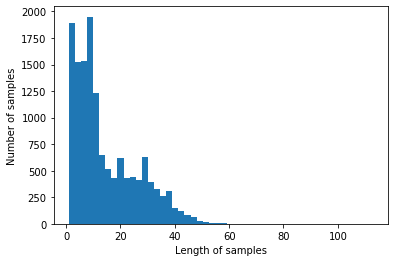

In [6]:
import numpy as np
import matplotlib.pyplot as plt

print('MAX length : %d' % max(len(l) for l in sentence_list))
print('AVG length : %f' % (sum(map(len, sentence_list))/len(sentence_list)))
plt.hist([len(s) for s in sentence_list], bins=50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.show()

In [7]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

max_words = 4000

vocab = Tokenizer(num_words=max_words, oov_token='OOV')
vocab.fit_on_texts(sentence_list)

tag = Tokenizer()
tag.fit_on_texts(tag_list)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint

In [8]:
vocab_size = max_words
tag_size = len(tag.word_index) + 1
print(vocab_size, tag_size)

4000 10


In [9]:
X_train = vocab.texts_to_sequences(sentence_list)
y_train = tag.texts_to_sequences(tag_list)

In [10]:
X_train[0]


[989, 1, 205, 629, 7, 3939, 216, 1, 3]

In [11]:
y_train[0]

[4, 1, 7, 1, 1, 1, 7, 1, 1]

In [12]:
index2word = vocab.index_word
index2ner = tag.index_word

In [13]:
index2ner

{1: 'o',
 2: 'b-loc',
 3: 'b-per',
 4: 'b-org',
 5: 'i-per',
 6: 'i-org',
 7: 'b-misc',
 8: 'i-loc',
 9: 'i-misc'}

In [14]:
ex_decoded = []
for index in X_train[0] : 
    ex_decoded.append(index2word[index])

In [15]:
sentence_list[0]

['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']

In [16]:
ex_decoded

['eu', 'OOV', 'german', 'call', 'to', 'boycott', 'british', 'OOV', '.']

In [17]:
max_len = 70
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=42)

In [19]:
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len, mask_zero=True))
model.add(LSTM(units=500, return_sequences=True, recurrent_dropout=0.2, dropout=0.2))
model.add(TimeDistributed(Dense(tag_size, activation='softmax')))
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 70, 128)           512000    
_________________________________________________________________
lstm (LSTM)                  (None, 70, 500)           1258000   
_________________________________________________________________
time_distributed (TimeDistri (None, 70, 10)            5010      
Total params: 1,775,010
Trainable params: 1,775,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=4,  validation_data=(X_test, y_test))

Train on 11232 samples, validate on 2809 samples
Epoch 1/4
 6656/11232 [================>.............] - ETA: 1:58 - loss: 0.2197 - acc: 0.8174

In [31]:
model.evaluate(X_test, y_test)[1]

2809/2809 [==============================] - 28s 10ms/sample - loss: 0.0577 - acc: 0.9217


0.9217083

In [10]:
def result_index(i):
    y_pred = model.predict(np.array([X_test[i]]))
    y_pred = np.argmax(y_pred,axis=-1)
    true = np.argmax(y_test[i],-1)
    
    print("{:15}|{:5}|{}".format('word','actual','predicted'))
    print(35*"-")
    
    for w,t,pred in zip(X_test[i], true, y_pred[0]):
        if w!= 0:
            print("{:17}:{:7}{}".format(index2word[w], index2ner[t].upper(),index2ner[pred].upper()))

In [37]:
### input a result from the index to see what the actual and predicted values were.
result_index(1)

word           |actual|predicted
-----------------------------------
ties             :O      O
between          :O      O
the              :O      O
two              :O      O
neighbours       :O      O
,                :O      O
OOV              :O      O
also             :O      O
over             :O      O
a                :O      O
military         :O      O
accord           :O      O
between          :O      O
turkey           :B-LOC  B-LOC
and              :O      O
israel           :B-LOC  B-LOC
which            :O      O
drew             :O      O
strong           :O      O
iranian          :B-MISC B-MISC
OOV              :O      O
,                :O      O
have             :O      O
improved         :O      O
since            :O      O
islamist         :B-MISC B-MISC
OOV              :B-PER  O
erbakan          :I-PER  B-PER
took             :O      O
over             :O      O
as               :O      O
turkish          :B-MISC B-MISC
prime            :O      O
minister     